In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df=pd.DataFrame(data=data)

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

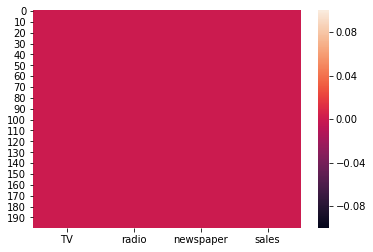

In [8]:
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x28314240b70>,
 'caps': [<matplotlib.lines.Line2D at 0x2831424e710>,
 'boxes': [<matplotlib.lines.Line2D at 0x28313f58ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x2831424eda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2831424ee80>],
 'means': []}

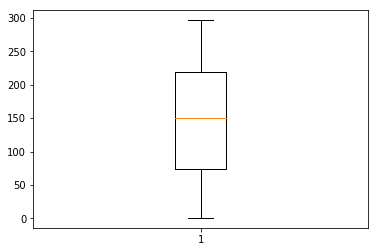

In [9]:
plt.boxplot(df['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28314437978>,
 'caps': [<matplotlib.lines.Line2D at 0x28314437fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28314437550>],
 'medians': [<matplotlib.lines.Line2D at 0x283144406a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x283144409e8>],
 'means': []}

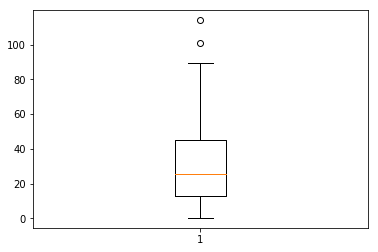

In [10]:
plt.boxplot(df['newspaper'])

In [11]:
from scipy.stats import zscore

In [12]:
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [13]:
df.shape

(200, 4)

In [14]:
df_new.shape

(198, 4)

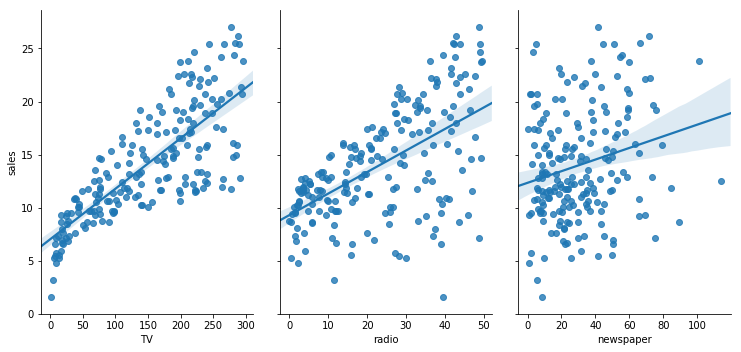

In [23]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=5,aspect=0.7,kind='reg')

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [19]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9231066612062119

In [20]:
pred=lr.predict(x_test)

In [21]:
r2_score(y_test,pred)

0.827120227985996

In [22]:
mean_squared_error(y_test,pred)

4.639333060737853